In [2]:
pip  install librosa --user

  Using cached librosa-0.10.2.post1-py3-none-any.whl (260 kB)
  Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
  Using cached soxr-0.3.7-cp39-cp39-win_amd64.whl (184 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
  Using cached pooch-1.8.1-py3-none-any.whl (62 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white",palette=None)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle=cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [5]:
dir='C:/Users/User/Downloads/ESA/'
audiofiles=glob(dir+'*/*.wav')
ipd.Audio(audiofiles[1])#playing audio file



In [15]:
y , sr=librosa.load(audiofiles[1])#y raw data sr sample rate
print(y[:10])
print(y.shape)
print(sr)

[-2.6555711e-06 -1.2237584e-05 -9.1077754e-07  1.8360195e-06
 -2.6757132e-06  4.1508615e-06 -1.1320495e-05 -7.1201994e-06
 -1.7251248e-05 -8.6799573e-06]
(73574,)
22050


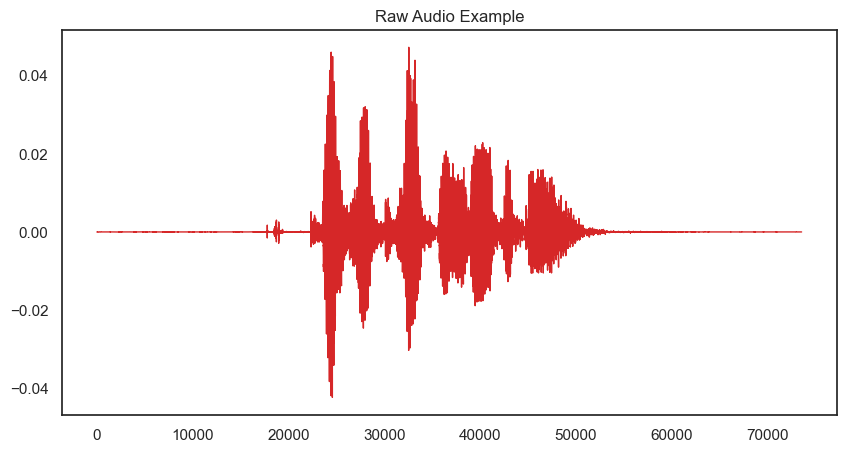

In [22]:
pd.Series(y).plot(figsize=(10,5), lw=1,title='Raw Audio Example',color=color_pal[3])
plt.show()

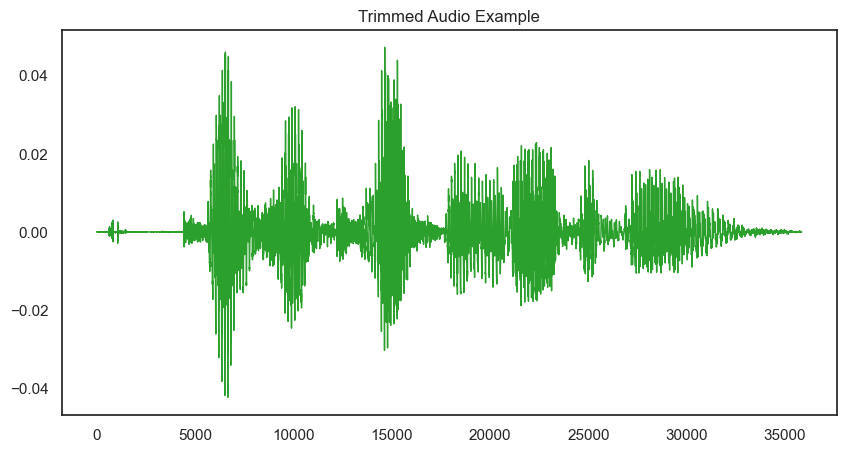

In [29]:
y_trimmed,_=librosa.effects.trim(y , top_db=40)
pd.Series(y_trimmed).plot(figsize=(10,5), lw=1,title='Trimmed Audio Example',color=color_pal[2])
plt.show()
#trimmed silenced parts

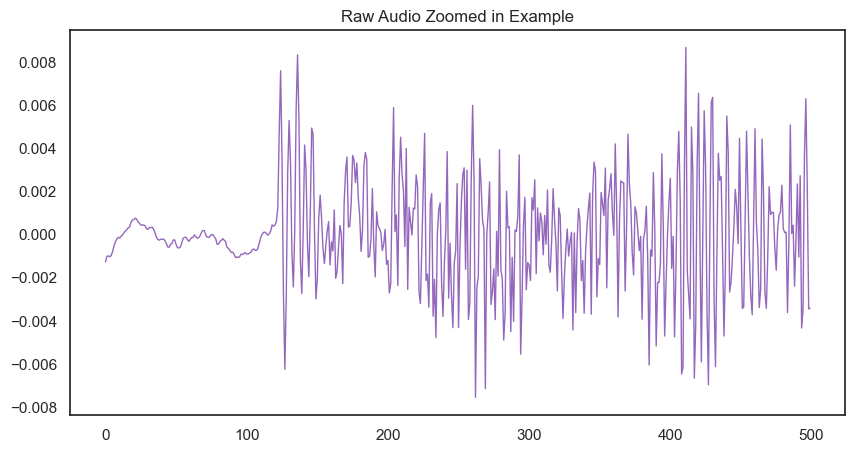

In [31]:
pd.Series(y[30000:30500]).plot(figsize=(10,5), lw=1,title='Raw Audio Zoomed in Example',color=color_pal[4])
plt.show()

In [32]:
D=librosa.stft(y)
S_db=librosa.amplitude_to_db(np.abs(D),ref=np.max)
S_db.shape

(1025, 144)

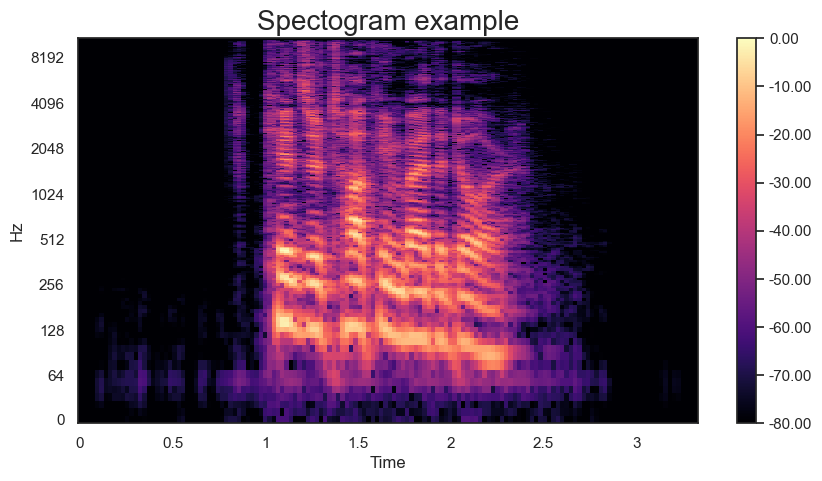

In [35]:
#plot the transformed audio data 
fig,ax=plt.subplots(figsize=(10,5))
img=librosa.display.specshow(S_db,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Spectogram example',fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

In [40]:
S=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128*2,)
S_db_mel=librosa.amplitude_to_db(S,ref=np.max)
S.shape


(256, 144)

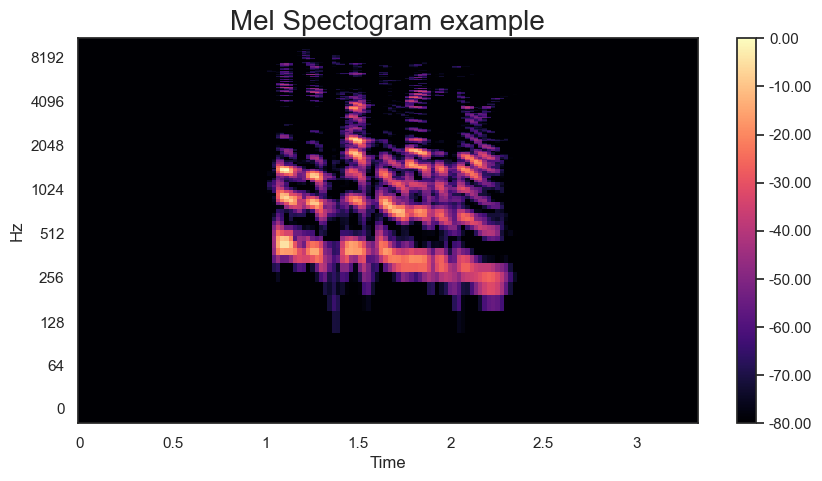

In [41]:

#plot the mel spectogram
fig,ax=plt.subplots(figsize=(10,5))
img=librosa.display.specshow(S_db_mel,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Mel Spectogram example',fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

In [42]:
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)